# Netflix data set 
####  Goal:
The main goal is to analyze and visualize netflix titles to uncover patterns ,trends , and relationships within platforms content library
1. data cleaning 
2. Visulaize content distribution and trends 
3. Explore relationships between features


##### Load Dataset

In [1]:
#importing
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
#Basic inforation and overview
print("Shape:",df.shape)

#data info
print("Info:",df.info())

# summarie
print(df.describe())

Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
Info: None
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


###### insight
1. total 8807 entries with 12 features(1 numeric and 11 category)
2. some missing values exit 

##### Missing value analysis 

In [3]:

missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df)) *100

})
missing.sort_values(by='missing_percent',ascending=False)



,missing_count,missing_percent
director,2634,29.908028
country,831,9.435676
cast,825,9.367549
date_added,10,0.113546
rating,4,0.045418
duration,3,0.034064
show_id,0,0.000000
type,0,0.000000
title,0,0.000000
release_year,0,0.000000


##### Handling missing values 

In [6]:
# Fill high-missing categorical/text columns with placeholders
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

# Fill low-missing columns appropriately
df['rating'] = df['rating'].fillna('Not Rated')

# For date_added, since only 10 missing, you can either:
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

# For duration (very few missing values), you can fill with median or mean
df['duration'] = df['duration'].fillna(df['duration'].mode()[0])

# missing values after cleaning 
print("Missing values after cleaning:\n",df.isnull().sum())

Missing values after cleaning:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


###### Insight
The largest missing portion (29.9% in director) shows Netflix often omits director information — this limits analysis based on directors.

Country and cast have minor gaps (~9%), so regional or actor analyses will still be fairly reliable.

In [7]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()

# Convert relevant columns to categorical type
df['type'] = df['type'].astype('category')
df['rating'] = df['rating'].astype('category')
df['country'] = df['country'].astype('category')
df['listed_in'] = df['listed_in'].astype('category')

# Check info again
df.info()


Duplicate rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      8807 non-null   object  
 4   cast          8807 non-null   object  
 5   country       8807 non-null   category
 6   date_added    8807 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8807 non-null   category
 9   duration      8807 non-null   object  
 10  listed_in     8807 non-null   category
 11  description   8807 non-null   object  
dtypes: category(4), int64(1), object(7)
memory usage: 645.2+ KB


####  Analysis

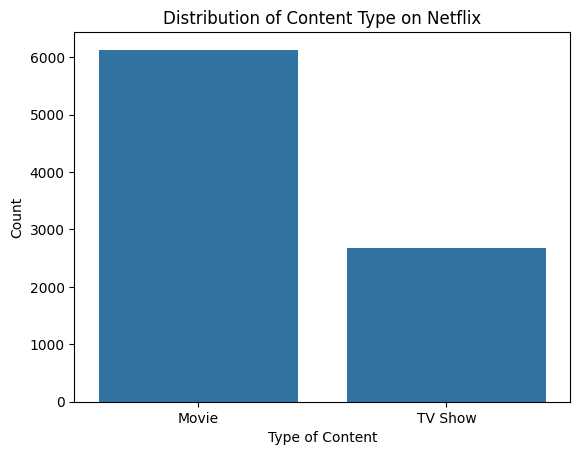

In [10]:

#univariate analysis 
#Distribution of type
sns.countplot(data=df, x='type')
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()



###### Insight 
Netflix's catalog typically has more Movies than TV shows


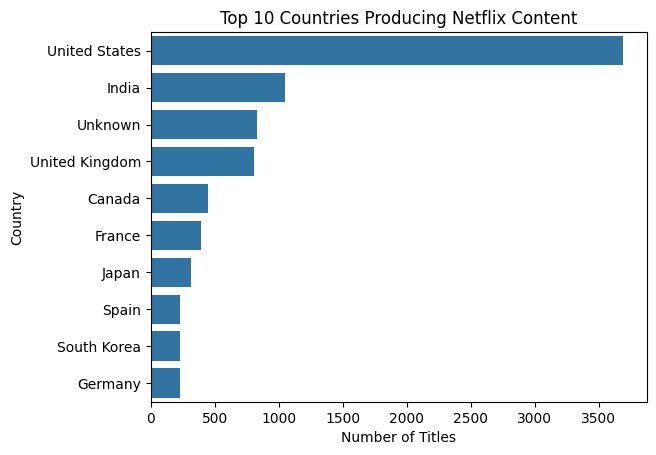

C:\Users\Bhavani\AppData\Local\Temp\ipykernel_12148\431369105.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='mako')


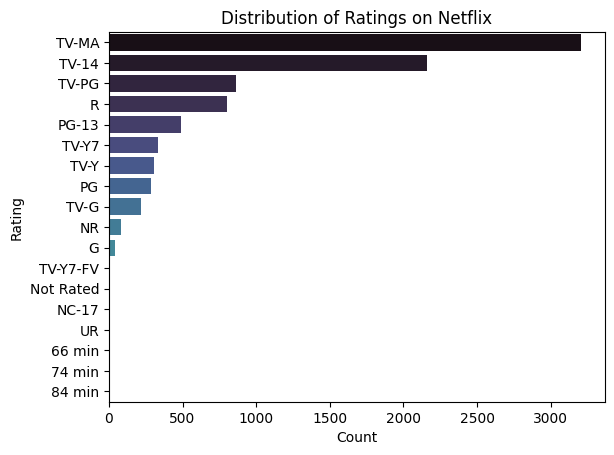

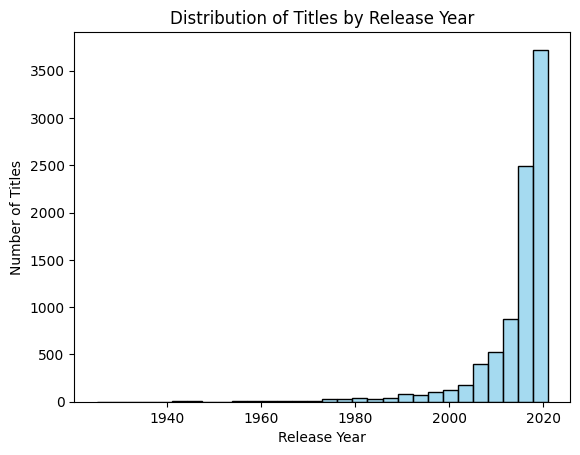

C:\Users\Bhavani\AppData\Local\Temp\ipykernel_12148\431369105.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket')


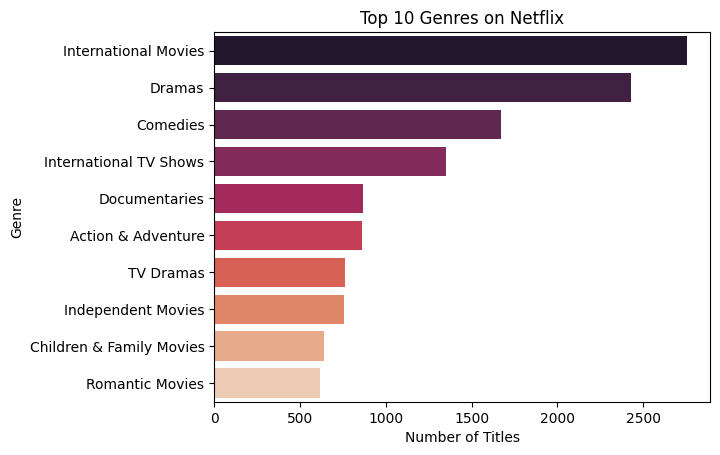

In [25]:
# distribution of top countries producing content
# # Split multiple countries into separate rows
countries_exploded = df['country'].str.split(',').explode().str.strip()

# Count top 10 countries
top_countries = countries_exploded.value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()
# content rating distribution
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index, palette='mako')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()
#Content over Release years
sns.histplot(df['release_year'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Titles by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()
# distribution of genrics
genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()



###### Insight
1. usa lead by a wide margin ,followed by india 
2. Most titles are rated TV-MA
3. Most content was released after 2010
4. The most frequent geners are dramas,comedies 

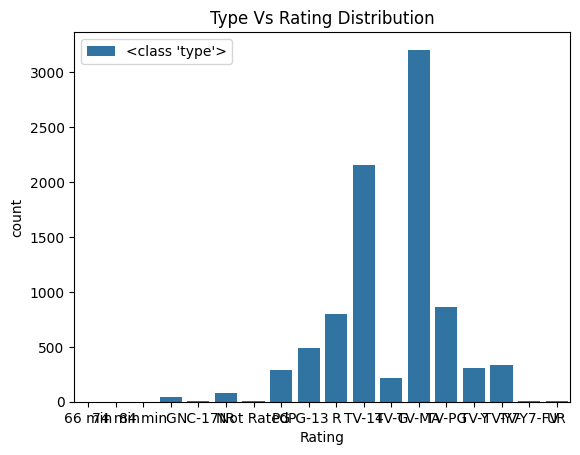

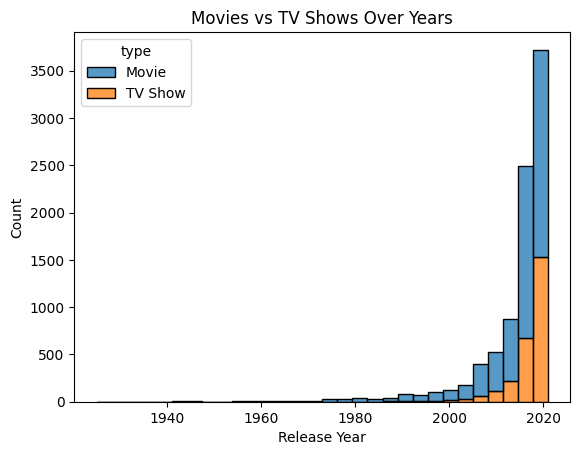

In [27]:
## Bivariate Analysis 
# type vs Rating 
sns.countplot(data=df,x='rating',hue=type)
plt.title("Type Vs Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("count")
plt.show()

# Type vs release year
sns.histplot(data=df, x='release_year', hue='type', multiple='stack', bins=30)
plt.title('Movies vs TV Shows Over Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


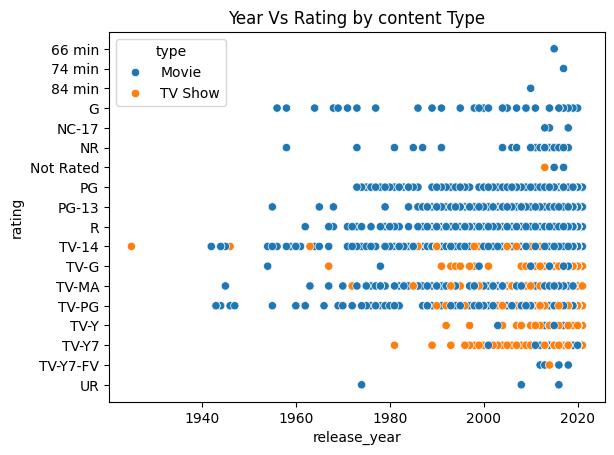

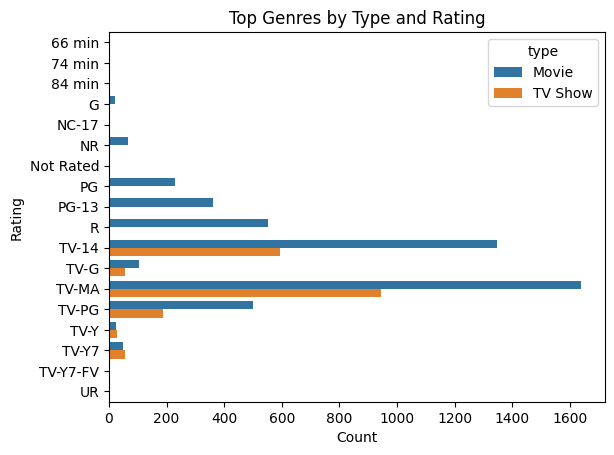

In [29]:
## Multivariate Analysis
sns.scatterplot(data=df,x='release_year',y='rating',hue='type')
plt.title("Year Vs Rating by content Type")
plt.show()

# Genre vs type vs rating
top_genres = genres.value_counts().head(5).index
subset = df[df['listed_in'].str.contains('|'.join(top_genres))]
sns.countplot(data=subset, y='rating', hue='type')
plt.title('Top Genres by Type and Rating')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

#### Outlier


Number of outliers in duration: 2


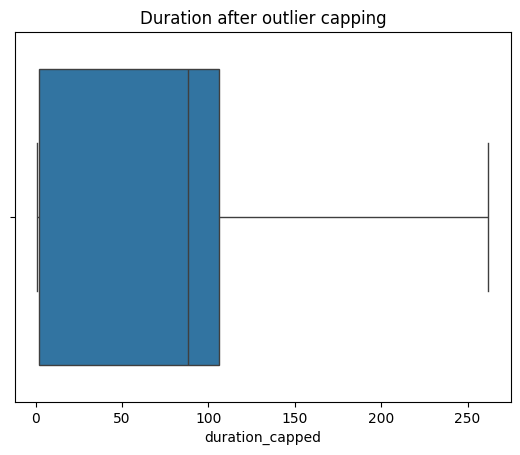

In [41]:
# IQR method
# Create numeric duration
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)

Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['duration'] < lower) | (df['duration'] > upper)]
print("Number of outliers in duration:", len(outliers))

# Cap outliers
df['duration_capped'] = df['duration'].clip(lower, upper)

# Visualization after capping
sns.boxplot(x=df['duration_capped'])
plt.title("Duration after outlier capping")
plt.show()


##### Feature Engineering




In [ ]:


df.columns = df.columns.str.strip()

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # convert to datetime
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['day_of_week_added'] = df['date_added'].dt.day_name()

